# Pandas in Google Colab — 2‑Hour Hands‑On Tutorial (with **tips** dataset)

**Last updated:** 2025-08-13

Welcome! In this guided session you'll learn and practise the pandas workflow end‑to‑end using the classic **tips** dataset.

### What you'll learn
- What pandas is and where it shines
- Importing data from URLs/files and first look
- Core manipulation (select, filter, sort, compute new columns)
- Cleaning & preprocessing (types, renaming, text ops, duplicates)
- Handling missing data (detect, drop, fill, groupwise fill, interpolate)
- Analysis & visualization (stats, histograms, boxplots, scatter, bars)
- Grouping, aggregations & joins/merges
- Reshaping (pivot, melt, stack/unstack)

> ⏱ **Time plan (~120 minutes)**  
> 0) Setup & load (10m)  
> 1) Import & manipulate (20m)  
> 2) Clean & preprocess (15m)  
> 3) Missing data (15m)  
> 4) Analysis & viz (20m)  
> 5) Group & merge (20m)  
> 6) Reshape & pivot (15m)  
> 7) Mini‑project + wrap‑up (5m)

**How to use this notebook**
- Run each cell top‑to‑bottom. Read the notes, then complete the **Exercises** marked with ✅.
- Use the **Solution** cells AFTER attempting the exercise.

---
## 0) Setup & Load the **tips** dataset (10m)

We'll use the public copy of `tips.csv` hosted in the seaborn-data repo.

In [ ]:
# Install/Import (Colab usually has these preinstalled)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options (feel free to tweak)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

# Load the tips dataset from GitHub (works in Colab)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url)

# Quick peek
tips.head()

In [3]:
# Basic metadata
print("Shape:", tips.shape)
print("\nInfo:")
print(tips.info())
print("\nDescribe:")
display(tips.describe(include='all'))

NameError: name 'tips' is not defined

**Columns overview**  
- `total_bill` (float): total bill in USD  
- `tip` (float): tip amount in USD  
- `sex` (category-like string): sex of bill payer  
- `smoker` (string): "Yes"/"No"  
- `day` (string): day of week (Thur, Fri, Sat, Sun)  
- `time` (string): Lunch/Dinner  
- `size` (int): party size

### ✅ Exercise 0
1. Print unique values for `day` and `time`.  
2. How many duplicate rows exist?  
3. Compute the average `total_bill` and `tip`.

In [4]:
# Solution: Exercise 0
print("Unique days:", tips['day'].unique())
print("Unique time:", tips['time'].unique())
print("Duplicates:", tips.duplicated().sum())
print("Avg total_bill:", tips['total_bill'].mean())
print("Avg tip:", tips['tip'].mean())

NameError: name 'tips' is not defined

In [ ]:
# Solution: Exercise 0
print("Unique days:", tips['day'].unique())
print("Unique time:", tips['time'].unique())
print("Duplicates:", tips.duplicated().sum())
print("Avg total_bill:", tips['total_bill'].mean())
print("Avg tip:", tips['tip'].mean())

In [1]:
#my solution
# 1) Unique values
print("Unique days:", tips['day'].unique())
print("Unique time:", tips['time'].unique())

# 2) Duplicates
print("Duplicates:", tips.duplicated().sum())

# 3) Averages
print("Avg total_bill:", tips['total_bill'].mean())
print("Avg tip:", tips['tip'].mean())


NameError: name 'tips' is not defined

---
## 1) Data import & core manipulation (20m)

We'll cover:
- Selecting rows/columns (`[]`, `.loc`, `.iloc`)
- Filtering (boolean masks, `.query`)
- Sorting (`.sort_values`)
- Creating new columns (`.assign` or direct assignment)

In [ ]:
# Column selection
tips[['total_bill', 'tip']].head()

In [ ]:
# Row selection by integer position
tips.iloc[0:5]  # first 5 rows

In [ ]:
# Row/column selection by labels (example)
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

In [ ]:
# Filtering with boolean masks
big_tables = tips[tips['size'] >= 5]
big_tables.head()

In [ ]:
# Filtering with query (nice for readability)
lunch_smokers = tips.query("time == 'Lunch' and smoker == 'Yes'")
lunch_smokers.head()

In [ ]:
# Sorting
tips_sorted = tips.sort_values(by=['total_bill', 'tip'], ascending=[False, True])
tips_sorted.head()

In [ ]:
# New columns: tip percentage and per-person tip
tips = tips.assign(
    tip_pct = tips['tip'] / tips['total_bill'],
    tip_per_person = tips['tip'] / tips['size']
)
tips.head()

### ✅ Exercise 1
1. Filter rows where `day` is **Sat** and `size` ≥ 3.  
2. Among those, create a new column `bill_per_person = total_bill / size`.  
3. Sort the result by `bill_per_person` descending and show top 5.

In [6]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Filter rows where day is 'Sat' and size >= 3
sat3 = tips[(tips['day'] == 'Sat') & (tips['size'] >= 3)]

# Add a new column for bill per person
sat3 = sat3.assign(bill_per_person = sat3['total_bill'] / sat3['size'])

# Sort by bill_per_person in descending order
sat3_sorted = sat3.sort_values('bill_per_person', ascending=False)

# Display the top rows
print(sat3_sorted.head())



     total_bill    tip     sex smoker  day    time  size  bill_per_person
170       50.81  10.00    Male    Yes  Sat  Dinner     3        16.936667
102       44.30   2.50  Female    Yes  Sat  Dinner     3        14.766667
212       48.33   9.00    Male     No  Sat  Dinner     4        12.082500
59        48.27   6.73    Male     No  Sat  Dinner     4        12.067500
238       35.83   4.67  Female     No  Sat  Dinner     3        11.943333


In [ ]:
# Solution: Exercise 1
sat3 = tips[(tips['day']=='Sat') & (tips['size']>=3)]
sat3 = sat3.assign(bill_per_person = sat3['total_bill']/sat3['size'])
sat3_sorted = sat3.sort_values('bill_per_person', ascending=False)
sat3_sorted.head()

---
## 2) Cleaning & preprocessing (15m)

We'll look at:
- Data types (`.dtypes`, `.astype`)
- Renaming columns (`.rename`)
- String fixes (case, trim)
- Removing duplicates (`.drop_duplicates`)

In [ ]:
# Data types
tips.dtypes

In [ ]:
# Cast text columns to 'category' for memory/performance (optional)
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')
tips.dtypes

In [ ]:
# Rename columns to snake_case
tips = tips.rename(columns={'total_bill':'total_bill', 'tip':'tip', 'tip_pct':'tip_pct',
                            'tip_per_person':'tip_per_person'})  # already clean, just demo

In [ ]:
# Simulate a messy string column and clean it
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

In [ ]:
# Remove duplicates (demo: make duplicates then drop)
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)  # add 2 duplicate rows
print("Before drop_duplicates:", demo.shape)
demo = demo.drop_duplicates()
print("After drop_duplicates:", demo.shape)

### ✅ Exercise 2
1. Ensure `size` is of type `int64`. If not, cast it.  
2. Create a clean copy `tips_clean` keeping only columns: `total_bill, tip, tip_pct, tip_per_person, sex, smoker, day, time, size`.  
3. Verify there are **no** duplicates in `tips_clean`.

In [7]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create extra columns needed for the exercise
tips['tip_pct'] = tips['tip'] / tips['total_bill']   # tip percentage
tips['tip_per_person'] = tips['tip'] / tips['size']  # tip per person

# Make sure 'size' column is int64
tips['size'] = tips['size'].astype('int64')

# Select required columns
tips_clean = tips[['total_bill','tip','tip_pct','tip_per_person',
                   'sex','smoker','day','time','size']].copy()

# Count duplicates
print("Duplicates in tips_clean:", tips_clean.duplicated().sum())


Duplicates in tips_clean: 1


In [ ]:
# Solution: Exercise 2
tips['size'] = tips['size'].astype('int64')
tips_clean = tips[['total_bill','tip','tip_pct','tip_per_person','sex','smoker','day','time','size']].copy()
print("Duplicates in tips_clean:", tips_clean.duplicated().sum())

---
## 3) Handling missing data (15m)

The original `tips` has no NaNs. We'll **inject** some missingness to learn:
- Detecting missing (`.isna()`/`.isnull()`)
- Dropping (`.dropna()`)
- Filling (`.fillna()`), including groupwise fills
- Interpolating (`.interpolate()`)

In [ ]:
# Create a copy with missing values
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan  # inject ~10% NaNs in 'tip'
tips_na.loc[mask, 'size'] = np.nan # inject NaNs in 'size' as well

tips_na.isna().sum()

In [ ]:
# Drop rows with any NaNs (demo)
dropped = tips_na.dropna()
dropped.shape

In [ ]:
# Simple fills
filled_const = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()})
filled_const.isna().sum()

In [ ]:
# Groupwise fill: fill 'tip' NaNs with group ('day','time') median tip
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

In [ ]:
# Interpolate numeric columns linearly (note: order matters; this is just demo)
tips_interp = tips_na.sort_values('total_bill').interpolate(numeric_only=True)
tips_interp.isna().sum()

### ✅ Exercise 3
1. From `tips_na`, drop only rows where **both** `tip` and `size` are missing, keep others.  
2. For remaining NaNs in `size`, fill with the **rounded mean size per `day`**.  
3. Verify no NaNs remain.

In [ ]:
# YOUR WORK: Exercise 3
# step1 = ...
# step2 = ...
# step2.isna().sum()

In [8]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset("tips")

# Make a copy and add some NaN values to simulate missing data (for exercise purposes)
tips_na = tips.copy()
tips_na.loc[5, 'tip'] = None
tips_na.loc[10, 'size'] = None
tips_na.loc[15, ['tip', 'size']] = None  # both missing

# Step 1: Remove rows where both tip and size are NaN
step1 = tips_na[~(tips_na['tip'].isna() & tips_na['size'].isna())].copy()

# Step 2: Fill missing 'size' with the mean size for that day (rounded)
mean_size_by_day = step1.groupby('day')['size'].transform('mean').round()
step2 = step1.copy()
step2['size'] = step2['size'].fillna(mean_size_by_day)

# Check remaining missing values
print(step2.isna().sum())


total_bill    0
tip           1
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


/tmp/ipython-input-3063337496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_size_by_day = step1.groupby('day')['size'].transform('mean').round()


---
## 4) Analysis & Visualization (20m)

We'll compute quick stats and build a few plots with **matplotlib** (no seaborn).  
Each chart uses its own code cell.

In [ ]:
# Descriptive stats
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))
print("\nCounts by day:")
print(tips['day'].value_counts())

print("\nSmoker ratio by time:")
print((tips.groupby('time')['smoker'].value_counts(normalize=True)*100).round(1))

In [ ]:
# Histogram of total_bill
plt.figure()
plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill')
plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Boxplot: tip by day
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day')
plt.xlabel('day')
plt.ylabel('tip')
plt.show()

In [ ]:
# Scatter: total_bill vs tip (marker size reflects party size)
plt.figure()
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [ ]:
# Bar chart: average tip_pct by day
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure()
plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day')
plt.xlabel('day')
plt.ylabel('mean tip_pct')
plt.show()

### ✅ Exercise 4
1. Create a scatter plot of `total_bill` vs `tip_pct`.  
2. Create a bar chart of **median** `total_bill` by `time`.

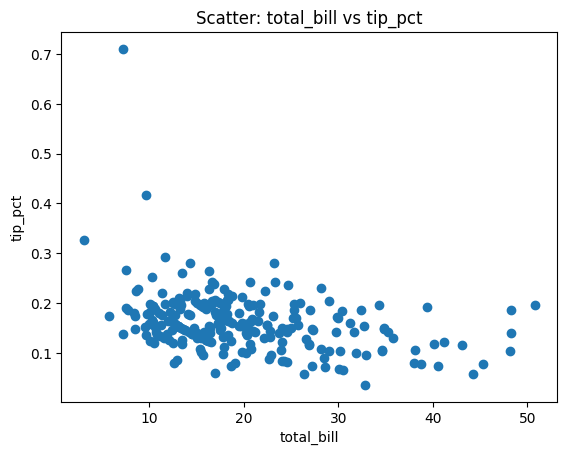

/tmp/ipython-input-4140689197.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = tips.groupby('time')['total_bill'].median()


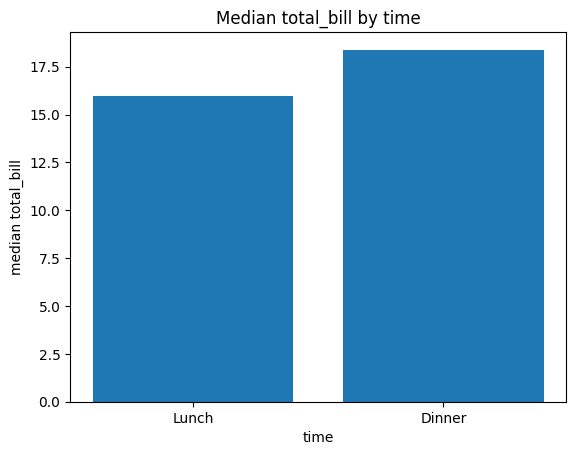

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Create tip percentage column
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# --- Scatter plot: total_bill vs tip_pct ---
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'])
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.show()

# --- Bar plot: median total_bill by time ---
med = tips.groupby('time')['total_bill'].median()

plt.figure()
plt.bar(med.index.astype(str), med.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()


In [ ]:
# Solution: Exercise 4
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'])
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill'); plt.ylabel('tip_pct'); plt.show()

med = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(med.index.astype(str), med.values)
plt.title('Median total_bill by time')
plt.xlabel('time'); plt.ylabel('median total_bill'); plt.show()

---
## 5) Grouping & Merging (20m)

- Groupby and multiple aggregations (`.agg`)
- Custom aggregations
- Merge with a lookup table

In [ ]:
# Grouping with multiple aggregations
g = (tips
     .groupby(['day','time'])
     .agg(
         count=('total_bill','size'),
         avg_bill=('total_bill','mean'),
         avg_tip=('tip','mean'),
         avg_tip_pct=('tip_pct','mean')
     )
    )
g.head()

In [ ]:
# Custom aggregation via apply
def pct_above_20(s):
    return (s > 0.20).mean()

custom = tips.groupby('day')['tip_pct'].apply(pct_above_20)
custom

In [ ]:
# Create a lookup table and merge (e.g., weekend flag)
day_lookup = pd.DataFrame({
    'day':['Thur','Fri','Sat','Sun'],
    'is_weekend':[False, False, True, True]
})

tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

### ✅ Exercise 5
1. Compute **total revenue** (`total_bill.sum()`) and **total tips** (`tip.sum()`) by `smoker` and `sex`.  
2. Merge `tips` with a small table mapping `time` → `meal_code` (Lunch→L, Dinner→D). Show distinct pairs.

In [10]:
import pandas as pd
import seaborn as sns
from IPython.display import display

# Load dataset
tips = sns.load_dataset("tips")

# --- Part 1: Aggregate total revenue and tips by smoker/sex ---
part1 = tips.groupby(['smoker', 'sex']).agg(
    total_revenue=('total_bill', 'sum'),
    total_tips=('tip', 'sum')
)
display(part1)

# --- Part 2: Map time to meal codes ---
time_map = pd.DataFrame({
    'time': ['Lunch', 'Dinner'],
    'meal_code': ['L', 'D']
})
part2 = tips.merge(time_map, on='time', how='left')

# Show unique time-meal_code pairs
display(part2[['time', 'meal_code']].drop_duplicates())


/tmp/ipython-input-3361493162.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  part1 = tips.groupby(['smoker', 'sex']).agg(


total_revenue  total_tips
smoker sex                              
Yes    Male          1337.07      183.07
       Female         593.27       96.74
No     Male          1919.75      302.00
       Female         977.68      149.77

,time,meal_code
0,Dinner,D
77,Lunch,L


In [ ]:
# Solution: Exercise 5
part1 = tips.groupby(['smoker','sex']).agg(total_revenue=('total_bill','sum'),
                                           total_tips=('tip','sum'))
display(part1)

time_map = pd.DataFrame({'time':['Lunch','Dinner'], 'meal_code':['L','D']})
part2 = tips.merge(time_map, on='time', how='left')
display(part2[['time','meal_code']].drop_duplicates())

---
## 6) Reshaping & Pivoting (15m)

- `pivot_table` for summarised 2D tables
- `stack` / `unstack`
- `melt` to go long‑format

In [ ]:
# Pivot: mean tip_pct by day (rows) and time (columns)
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
piv

In [ ]:
# Stack/Unstack demo
stacked = piv.stack()     # (day,time) index
unstacked = stacked.unstack()
unstacked

In [ ]:
# Melt: wide -> long
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'],
                                                    var_name='metric',
                                                    value_name='value')
long.head()

### ✅ Exercise 6
1. Build a pivot table of **mean total_bill** (values) by `size` (rows) and `day` (columns).  
2. Convert it back to long format with `melt` (id_vars should include `size`).

In [11]:
piv2 = tips.pivot_table(
    index='size',        # Rows: table size
    columns='day',       # Columns: days of the week
    values='total_bill', # Data to summarize
    aggfunc='mean'       # Average total bill
)


/tmp/ipython-input-545893505.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv2 = tips.pivot_table(


In [ ]:
# Solution: Exercise 6
piv2 = tips.pivot_table(index='size', columns='day', values='total_bill', aggfunc='mean')
long2 = piv2.reset_index().melt(id_vars=['size'], var_name='day', value_name='mean_total_bill')
display(piv2); display(long2.head())

---
## 7) Mini‑Project: When are tips the most generous? (5–10m)

Goal: Find the **day/time** combinations with the **highest average `tip_pct`** and visualise the matrix.

Steps:
1. Compute `piv` of mean `tip_pct` by `day` and `time`.  
2. Show top combinations.  
3. Visualise with an image plot (`imshow`).

In [ ]:
# 1) We already computed 'piv' above. Recompute for clarity:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')

# 2) Top combos
print(piv.stack().sort_values(ascending=False).head(5))

# 3) Visualise
plt.figure()
plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time')
plt.xlabel('time')
plt.ylabel('day')
plt.xticks(ticks=range(len(piv.columns)), labels=piv.columns.astype(str))
plt.yticks(ticks=range(len(piv.index)), labels=piv.index.astype(str))
plt.colorbar()
plt.show()

---
## Wrap‑Up & Next Steps

**You covered:** importing, selecting, filtering, sorting, adding columns; cleaning; missing data; analysis; plotting; grouping; merging; pivoting and reshaping.

**Next:** try pandas with your own dataset (CSV/Excel/SQL), practise joins, window functions (`.rolling`, `.expanding`), and time‑series (`DatetimeIndex`).

---

### Appendix: Colab tips
- Upload a local file:  
  ```python
  from google.colab import files
  up = files.upload()     # pick a file, then:
  import io
  import pandas as pd
  df = pd.read_csv(io.BytesIO(up['your_file.csv']))
  ```
- Mount Google Drive:  
  ```python
  from google.colab import drive
  drive.mount('/content/drive')
  # then: pd.read_csv('/content/drive/MyDrive/path/to/file.csv')
  ```

/tmp/ipython-input-3328017051.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(


day   time  
Fri   Lunch     0.188765
Sun   Dinner    0.166897
Thur  Lunch     0.161301
      Dinner    0.159744
Fri   Dinner    0.158916
dtype: float64


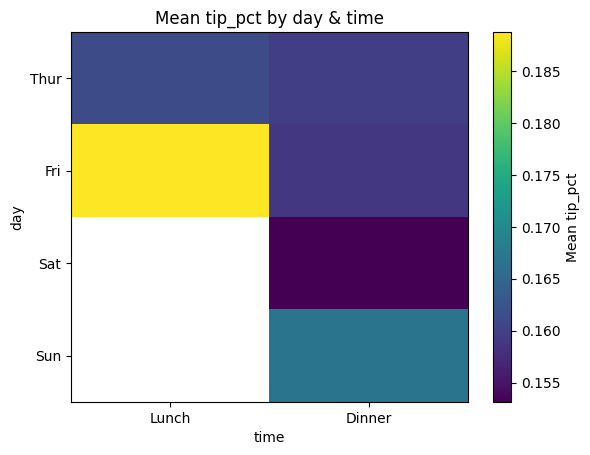

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
tips = sns.load_dataset("tips")

# Create tip percentage column
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# 1) Pivot table: Mean tip percentage by day and time
piv = tips.pivot_table(
    index='day',
    columns='time',
    values='tip_pct',
    aggfunc='mean'
)

# 2) Top combos (day-time) with highest mean tip_pct
print(piv.stack().sort_values(ascending=False).head(5))

# 3) Visualise pivot table values
plt.figure()
plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time')
plt.xlabel('time')
plt.ylabel('day')
plt.xticks(ticks=range(len(piv.columns)), labels=piv.columns.astype(str))
plt.yticks(ticks=range(len(piv.index)), labels=piv.index.astype(str))
plt.colorbar(label='Mean tip_pct')
plt.show()
